# Исследование российского кинопроката

Министерство культуры Российской Федерации предоставила данные о российском рынке кинопроката. Небходимо сделать преобработку данных и изучить их, чтобы найти интересные особенности и закономерности.

## Описание данных:
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма;
* `box_office` — сборы в рублях.

## План работы над проектом:
* Подлючить нужные библиотеки, открыть и ознакомиться с данными;
* Предобработка данных: проверка типов данных, устранение пропусков и дубликатов, добавление новых столбцоы;
* Исследовательский анализ данных: выявить закономерности в данных, сделать выводы.

## Основные задачи проекта:
* Выявить текущие тренды российского кинопроката;
* Выяснить как влияет возрастное ограничение фильма на его сборы;
* Проанализировать, как менялась доля выхода фильмов каждый год;
* Изучить динамику прокатов фильма по годам;
* Проанализировать как влияет государственная поддежрка на российские фильмы, окупаются ли они и какой у них рейтинг.

### 1. Откроем файлы с данными и объедините их в один датафрейм

 Загружаем данные из файла в датафрейм:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    df1 = pd.read_csv('C:\data\mkrf_movies.csv', sep=',')
    df2 = pd.read_csv('C:\data\mkrf_shows.csv', sep=',')
except:
    df1 = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv', sep=',')
    df2 = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv', sep=',')

In [3]:
df1.info() # информация о 1-ом датафрейме - 7486 строчки и 15 столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
df2.info() # информация о 2-ом датафрейме - 3158 строчек и 2 столбца

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
df1['puNumber'] = pd.to_numeric(df1['puNumber'], errors='coerce') # меняем тип данных столбца `puNumber` на int,
df1['puNumber'] = df1['puNumber'].fillna(-1)                      # чтобы соединить два датафрейма (df1 и df2)
df1['puNumber'] = df1['puNumber'].astype('int')

In [6]:
df = df1.merge(df2, on='puNumber', how='outer')
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [7]:
df.info() # информация о получившимся датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### 2. Предобработка данных

### 2.1. Проверим типы данных в датафрейме и преобразуйте там, где это необходимо:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Неккоректный тип данных имеют следующие столбцы:
* `show_start_date` - меняем тип object на datetime;
* `ratings` - меняем тип object на float.

In [9]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
df['show_start_date'] = df['show_start_date'].dt.tz_localize(None)

In [10]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce', downcast='float')
df['ratings'] = df['ratings'].fillna(-1)                      

### 2.2. Изучим пропуски в датафрейме и, при необходимости, заполним их:

In [11]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                     0
genres                    976
box_office               4328
dtype: int64

In [12]:
def gaps_in_dataframe(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропуски в датафрйме, %' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков нет')

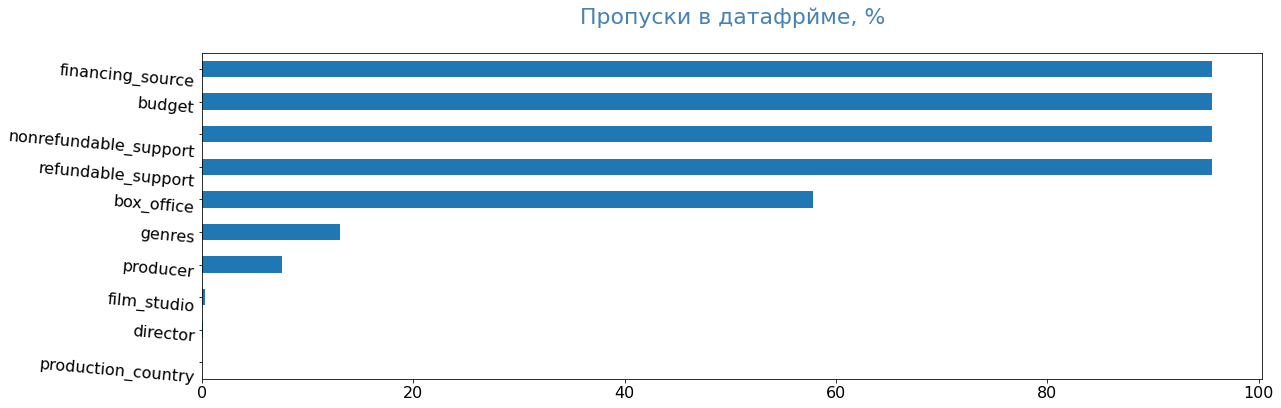

In [13]:
gaps_in_dataframe(df)

#### Больше всего пропусков в столбцах:
* `refundable_support `;
* `nonrefundable_support`;
* `budget`;
* `financing_source`. 

#### Пропуски в этих столбцах составляют почти 100% от всех данных. Заполнить пропуски в этих столбцах не получится, т.к. они не подчиняются никакой закономернности. 

In [14]:
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                     0
genres                    976
box_office               4328
dtype: int64

#### Пропуски в столбцах `box_office`,`genres`,`producer` заполнить не получиться, т.к. предположить режиссера, жанр или сборы фильма нельзя.

#### Пропуски в других столбцах составляют менее 10% и на результат анализа не повлияют.

### 2.3. Проверим датафрейм на наличие дубликатов:

In [15]:
print(f'Явных дубликатов: {df.duplicated().sum()}')

Явных дубликатов: 0


In [16]:
df['title'] = df['title'].str.lower() # приводим записи к нижнему регистру
df['title'] = df['title'].str.replace('_', '')

In [17]:
df['title'].tolist()

['открытый простор',
 'особо важное задание',
 'особо опасен',
 'особо опасен',
 'особо опасен',
 'остановился поезд',
 'любовь и голуби',
 'любовь и сигареты',
 'отпетые мошенники.',
 'отпуск за свой счет',
 'превосходство борна /по одноименной новелле роберта ладлэма/',
 'ответный ход',
 'малышка на миллион /по мотивам рассказов ф.х.тула из сборника "клейма от канатов"/',
 'преданный садовник',
 'отель /по мотивам пьесы джона уэбстера/',
 'председатель',
 'осенний марафон',
 'осень',
 'неподдающиеся',
 'неподсуден',
 'незабываемый 1919-й год',
 'незаконченная жизнь',
 'операция "ы" и другие приключения шурика',
 'неизвестные страницы из жизни разведчика',
 'неисправимый лгун',
 'призрак замка моррисвиль',
 'оружейный барон',
 'отставной козы барабанщик',
 'паршивая овца',
 'плюмбум, или опасная игра',
 'первое свидание',
 'охота на лис.',
 'пиноккио 3000',
 'перелом',
 'мисс поттер',
 'миссис хендерсон представляет',
 'планета ка-пэкс /по мотивам романа джин бруэр/',
 'молчи в тряпоч

In [18]:
df[df['title'] == 'успех']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
309,успех,111027414,2014-12-24 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,К.Худяков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,драма,NaN
5937,успех,111008418,2018-06-14 12:00:00,Художественный,Сунцов Валентин Валерьевич,Россия,В.Сунцов,В.Сунцов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,драма,NaN
7322,успех,111018519,2019-11-04 12:00:00,Художественный,"ООО ""Кинодом""",Россия,П.Руминов,"С.Бобза, Г.Малков, В.Поляков, М.Кучмент",«12+» - для детей старше 12 лет,5000000.0,20000000.0,75000000.0,Фонд кино,7.8,драма,3181218.0


#### В датафрейме есть фильмы с одинаковыми названиями, но это разные фильмы, не дубликаты (разный год выпуска, режиссер и т.д.), это не дубликаты, поэтому удалять такие фильмы не будем.

### 2.4. Изучим столбцы, в которых содержатся категориальные значения:

In [19]:
df['title'].tolist()

['открытый простор',
 'особо важное задание',
 'особо опасен',
 'особо опасен',
 'особо опасен',
 'остановился поезд',
 'любовь и голуби',
 'любовь и сигареты',
 'отпетые мошенники.',
 'отпуск за свой счет',
 'превосходство борна /по одноименной новелле роберта ладлэма/',
 'ответный ход',
 'малышка на миллион /по мотивам рассказов ф.х.тула из сборника "клейма от канатов"/',
 'преданный садовник',
 'отель /по мотивам пьесы джона уэбстера/',
 'председатель',
 'осенний марафон',
 'осень',
 'неподдающиеся',
 'неподсуден',
 'незабываемый 1919-й год',
 'незаконченная жизнь',
 'операция "ы" и другие приключения шурика',
 'неизвестные страницы из жизни разведчика',
 'неисправимый лгун',
 'призрак замка моррисвиль',
 'оружейный барон',
 'отставной козы барабанщик',
 'паршивая овца',
 'плюмбум, или опасная игра',
 'первое свидание',
 'охота на лис.',
 'пиноккио 3000',
 'перелом',
 'мисс поттер',
 'миссис хендерсон представляет',
 'планета ка-пэкс /по мотивам романа джин бруэр/',
 'молчи в тряпоч

In [20]:
df['type'] = df['type'].str.lower()
df['type'].unique()

array(['художественный', 'анимационный', 'прочие', 'документальный',
       'научно-популярный', ' художественный', ' анимационный',
       'музыкально-развлекательный'], dtype=object)

In [21]:
df['film_studio'] = df['film_studio'].str.lower()
df['film_studio'].tolist()

['тачстоун пикчерз, кобальт пикчерз, бикон пикчерз, тиг продакшнз',
 'киностудия "мосфильм"',
 'юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз',
 'юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз',
 'юниверсал пикчерз, кикстарт продакшнз, марк платт продакшнз, рилейтивити медиа, спайгласс интертейнмент, стилкин филмз, топ кау продакшнз',
 'киностудия "мосфильм"',
 'киностудия "мосфильм"',
 'юнайтед артистс, грин стрит филмз, айкон интертейнмент интернэшнл',
 'пульсар продюксьон, тф1 фильм ',
 'киностудия "мосфильм", телевидение внр',
 'кеннеди/маршал компани, юниверсал пикчерз, гипнотик, калима продакшнз, лудлум интертейнмент',
 'киностудия "мосфильм"',
 'уорнер бразерс, лейкшор интертейнмент, малпасо продакшнз, альберт с.рудди продакшнз',
 'потбойлер продакшнз, эпсилон моушн пикчерз, скайон филмз лимитед, юк

In [22]:
df['production_country'] = df['production_country'].str.lower()
df['production_country'] = df['production_country'].str.replace('-', ',')
df['production_country'] = df['production_country'].str.replace(';', '')
df['production_country'] = df['production_country'].str.replace('2019', 'германия')
df['production_country'].unique()

array(['сша', 'ссср', 'франция', 'ссср, венгрия',
       'германия,великобритания', 'великобритания , италия',
       'чехословакия', 'сша , франция , турция', 'новая зеландия',
       'канада , франция , испания', 'сша,германия',
       'сша , великобритания', 'великобритания', 'сша , германия',
       'франция , мексика , сша', 'россия, казахстан, сша',
       'ссср, швеция', 'ссср, франция, англия, куба, гдр', 'германия',
       'великобритания,сша,германия,кнр',
       'ссср, чсср, западный берлин, пнр', 'ссср, италия', 'гонконг, кнр',
       'сша , франция', 'сша , япония , франция , великобритания',
       'гонконг , сингапур , таиланд , великобритания', 'сша,канада',
       'франция , италия , великобритания , сша', 'франция , сша',
       'ирландия,великобритания,германия', 'чехия', 'сша,австралия',
       'ссср, финляндия', 'сша,франция,великобритания,австрия',
       'сша , бельгия', 'сша , ирландия , великобритания',
       'великобритания , сша',
       'люксембург , нидерл

In [23]:
df['director'] = df['director'].str.lower()
df['director'].tolist()

['кевин костнер',
 'е.матвеев',
 'тимур бекмамбетов',
 'тимур бекмамбетов',
 'тимур бекмамбетов',
 'в.абдрашитов',
 'в.меньшов',
 'джон туртурро',
 'эрик беснард',
 'в.титов',
 'пол грингросс',
 'м.туманишвили',
 'клинт иствуд',
 'фернанду мейрелльеш',
 'майк фиггис',
 'а.салтыков',
 'г.данелия',
 'а.смирнов',
 'ю.чулюкин',
 'в.краснопольский, в.усков',
 'м.чиаурели',
 'лассе халлстрем',
 'л.гайдай',
 'в.чеботарев',
 'в.азаров',
 'боривой земан',
 'эндрю никкол',
 'г.мыльников',
 'джонатан кинг',
 'в.абдрашитов',
 'и.бабич',
 'в.абдрашитов',
 'даниэль робишо',
 'грегори хоблит',
 'крис нунан',
 'стивен фрирз',
 'йэн софтли',
 'найл джонсон',
 'и.бабич',
 'р.быков',
 'роб райнер',
 'роб райнер',
 'бен янгер',
 'роб маршалл',
 'е.ташков',
 'н.михалков',
 'ю.карасик',
 'а.тарковский',
 'джон франкенхаймер',
 'оливье маршал',
 'с.соловьев',
 'иоахим реннинг, эспен сандберг',
 'ролан быков',
 'семен туманов',
 'питер сигал',
 'м.ромм',
 'г.полока',
 'ю.райзман',
 'дрю дэйуолт, дэвид шнейдер

In [24]:
df['age_restriction'] = df['age_restriction'].str.lower()
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [25]:
df['financing_source'] = df['financing_source'].str.lower()
df['financing_source'].unique()

array([nan, 'министерство культуры', 'фонд кино',
       'министерство культуры, фонд кино'], dtype=object)

#### Большое количество категориальных значений можеть быть проблемой при анализе данных, т.к. именно в категориальных значениях проще совершить опечатку, например, поставить вместо запятой тире,  слуйчано поставить не тот знак пунктуации или вообще пропустить его. Также, дополнительную трудность для анализа  представляют несколько значений в одной ячейке, например, как в столбце `director`, но эту проблему мы решим дальше, создав отдельные столбцы для главных режиссёров.

### 2.5. Изучим столбцы с количественными значениями:

In [26]:
df = df.query('ratings > 0')
df['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 8.2, 7.5, 6.7, 7.9, 5.9, 6.2,
       5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4, 4.4,
       4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6, 4.2, 5.2,
       4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 3.7, 1.4, 3.1, 3.5, 3.2, 2.8, 1.5,
       2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 1. , 1.3, 1.9, 1.8, 1.2, 1.7, 9. ,
       8.9, 9.1], dtype=float32)

<AxesSubplot:>

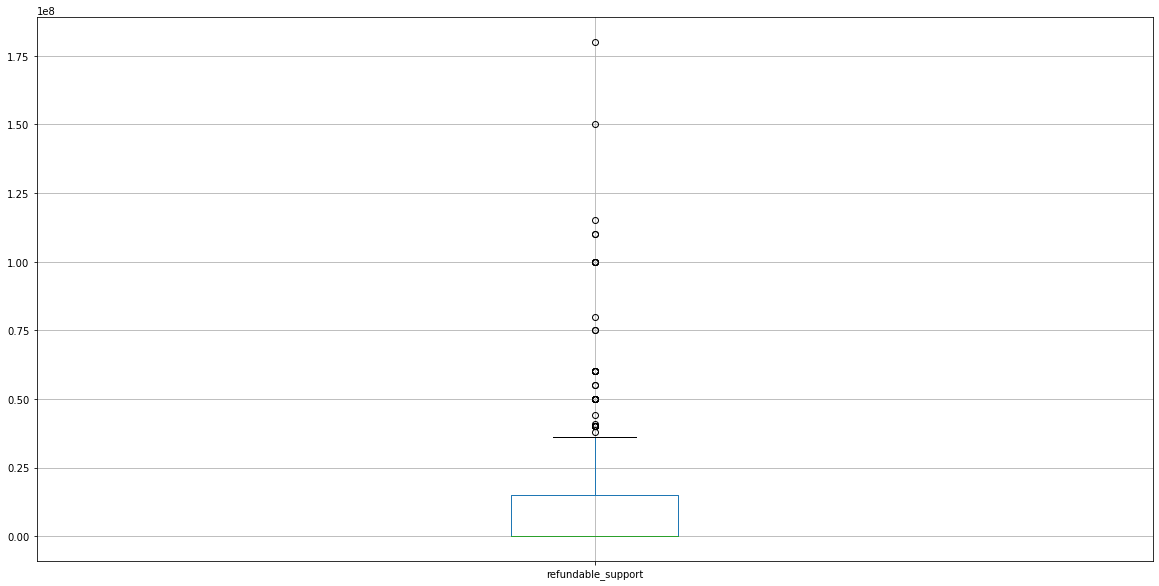

In [27]:
df['refundable_support'].describe()
df.boxplot('refundable_support', figsize=(20,10))

<AxesSubplot:>

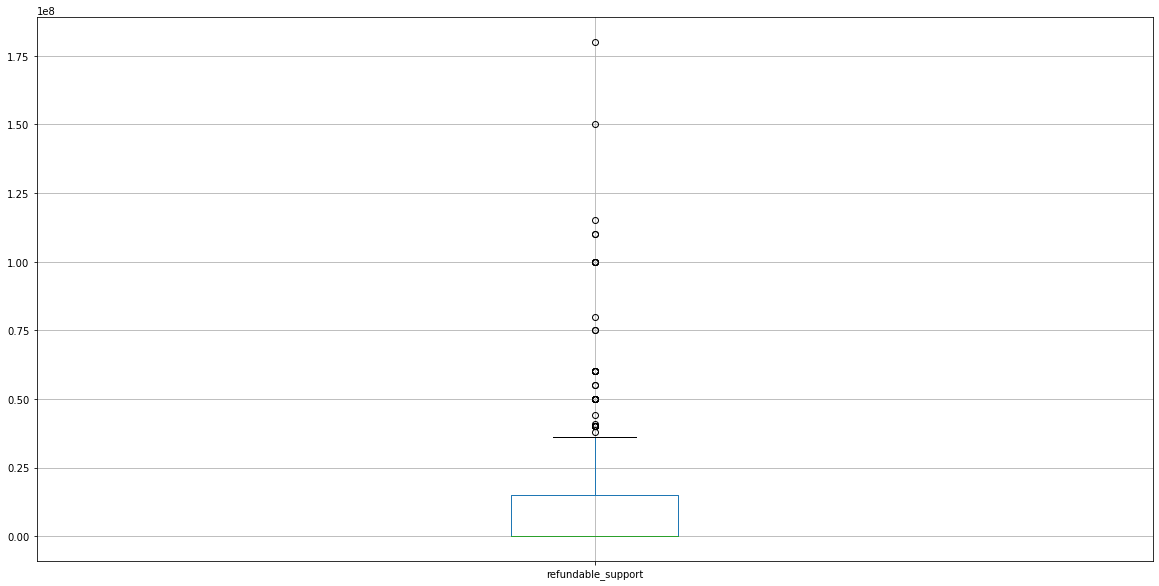

In [28]:
df['nonrefundable_support'].describe()
df.boxplot('refundable_support', figsize=(20,10))

<AxesSubplot:>

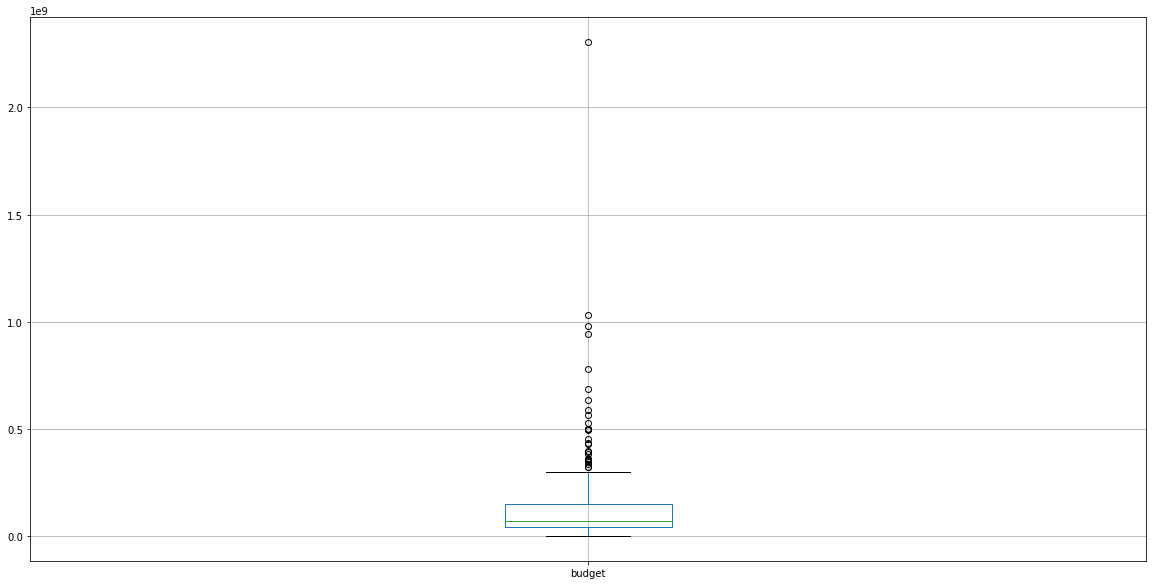

In [29]:
df['budget'].describe()
df.boxplot('budget', figsize=(20,10))

<AxesSubplot:>

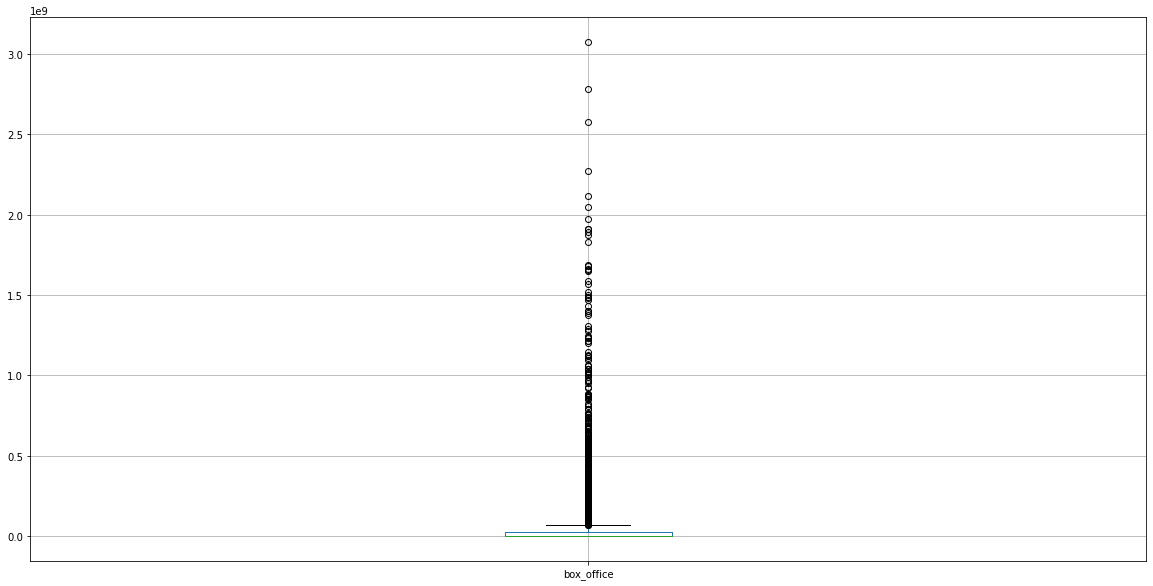

In [30]:
df['box_office'].describe()
df.boxplot('box_office', figsize=(20,10))

#### В столбцах с количественными значениями можно встретить общую проблему - наличие нулевых значений, это может означать, что фильм никак не спонсировался или, например, фильм иностранный, поэтому у него нет гос. поддержки, проверим эту гипотезу:

In [31]:
df[df['financing_source'].isna()].head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,особо важное задание,111013716,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,особо опасен,221038416,2016-10-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916,2016-06-10 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815,2015-07-29 12:00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,остановился поезд,111013816,2016-09-13 12:00:00,художественный,"киностудия ""мосфильм""",ссср,в.абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,любовь и голуби,111007013,2013-10-18 12:00:00,художественный,"киностудия ""мосфильм""",ссср,в.меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,любовь и сигареты,221074614,2014-12-29 12:00:00,художественный,"юнайтед артистс, грин стрит филмз, айкон интер...",сша,джон туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,отпетые мошенники.,121011416,2016-05-05 12:00:00,художественный,"пульсар продюксьон, тф1 фильм",франция,эрик беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,отпуск за свой счет,111019114,2014-12-01 12:00:00,художественный,"киностудия ""мосфильм"", телевидение внр","ссср, венгрия",в.титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


#### Гипотеза потвердилась, фильмы, которые не имеют гос. поддержку, - иностранные.

#### Проверим вторую гипотезу - может ли бюджет быть меньше, чем сумма гос. поддержки:

In [32]:
df[df['budget']< df['refundable_support'] + df['nonrefundable_support']].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"министерство культуры, фонд кино",6.6,мелодрама,10234016.1
2058,дуxless 2,111000415,2015-01-26 12:00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,фонд кино,6.6,драма,446163511.0
2472,воин (2015),111017315,2015-09-28 12:00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,фонд кино,7.8,"боевик,драма,криминал",196572438.4
2532,бармен.,111009615,2015-05-26 12:00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,фонд кино,6.2,"комедия,фэнтези",67418974.8
2615,савва. сердце воина,114001715,2015-07-21 12:00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.4


#### Да, такие фильмы встречаются. Тут точно что-то не так, данные о других источниках бюджета "потерялись", либо их не записали или данные случайно удалились при выгрузке. В данной ситуации я бы обратилась коллегам, которые делали выгрузку и узнала бы куда пропала часть данных.

### 2.6. Добавим новые столбцы в датафрейм:

#### 2.6.1. Добавим столбец с годом проката:

In [33]:
df['film_release'] = df['show_start_date'].dt.year
df['film_release']

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7476    2019
7477    2019
7478    2019
7482    2019
7485    2019
Name: film_release, Length: 6490, dtype: int64

#### 2.6.2. Добавим два столбца - с именем и фамилией главного режиссёра и основным жанром фильма:

Чтобы заполнить эти столбцы, воспользуемся собственной функцией

In [34]:
def get_first_value(s):
    value_lst = s.split(',')
    return value_lst[0]

In [35]:
df['director'] = df['director'].astype(str)
df['main_director'] = df['director'].apply(get_first_value) # Имя и фамилия режиссёра

In [36]:
df['genres'] = df['genres'].astype(str)
df['main_genre'] = df['genres'].apply(get_first_value) # Основной жанр фильма

In [37]:
df[['main_director', 'main_genre']]

,main_director,main_genre
0,кевин костнер,боевик
1,е.матвеев,драма
2,тимур бекмамбетов,фантастика
3,тимур бекмамбетов,фантастика
4,тимур бекмамбетов,фантастика
...,...,...
7476,и.северов,драма
7477,симона костова,драма
7478,м.бальчюнас (псевдоним м.вайсберг),комедия
7482,ник пауэлл,боевик


#### 2.6.3. Добавим столбец, отображающий какую долю (в процентах) от общего бюджета фильма составляет государственная поддержка:

In [38]:
df['share_refundable_support'] = ((df['refundable_support'] + df['nonrefundable_support']) / df['budget']) * 100
df['share_refundable_support']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
7476    64.999783
7477          NaN
7478    66.601175
7482          NaN
7485          NaN
Name: share_refundable_support, Length: 6490, dtype: float64

### 3. Исследовательский анализ данных

### 3.1. Посмотрим, сколько фильмов выходило в прокат каждый год:

In [39]:
df.value_counts('film_release')

film_release
2010    911
2014    739
2019    722
2016    711
2018    656
2015    615
2013    582
2011    575
2012    545
2017    434
dtype: int64

<AxesSubplot:>

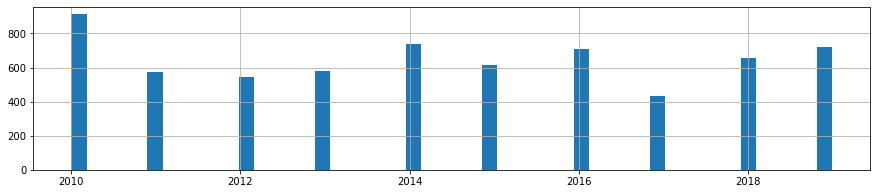

In [40]:
df['film_release'].hist(bins = 50, figsize = (15,3))

#### Больше всего фильмов выходило в 2010, 2014, 2016, 2018 и 2019 годах - почти семьсот фильмов ежегодно!

#### 3.1.1. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах:

In [41]:
share_rentals = (len(df['box_office']) -  df['box_office'].isna().sum()) / len(df['puNumber']) * 100
print(f'Доля фильмов, с указанной информацией о прокате в кинотеатре, составляет: {share_rentals}')

Доля фильмов, с указанной информацией о прокате в кинотеатре, составляет: 44.66872110939907


#### 3.1.2. Проанализируем, как эта доля менялась по годам:

In [42]:
value_films = pd.pivot_table(df, index=['film_release'], values=['box_office', 'puNumber'], aggfunc='count')
value_films['value'] = (value_films['box_office'] / value_films['puNumber']) * 100
value_films

,box_office,puNumber,value
film_release,,,
2010,102,911,11.196487
2011,104,575,18.086957
2012,122,545,22.385321
2013,180,582,30.927835
2014,262,739,35.453315
2015,415,615,67.479675
2016,464,711,65.260197
2017,332,434,76.497696
2018,443,656,67.530488


Text(0, 0.5, 'Доля')

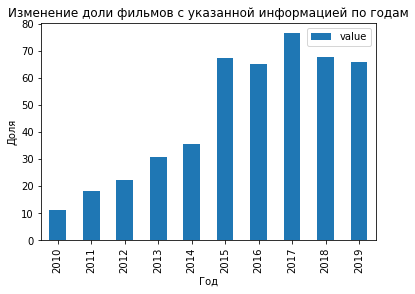

In [43]:
value_films = pd.pivot_table(value_films, index=['film_release'], values=['value']).plot(kind='bar')
plt.title('Изменение доли фильмов с указанной информацией по годам')
plt.xlabel('Год')
plt.ylabel('Доля') 

#### С каждым годом доля росла, но полнее всего данные представлены за период 2017 года.

### 3.2. Изучим, как менялась динамика проката по годам - в каком году сборы были максимальные и минимальные:

Text(0, 0.5, 'Сборы в руб.')

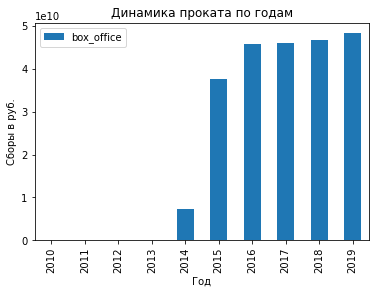

In [44]:
value_films = pd.pivot_table(df, index=['film_release'], values=['box_office'], aggfunc='sum').plot(kind='bar')
plt.title('Динамика проката по годам')
plt.xlabel('Год')
plt.ylabel('Сборы в руб.')

#### Больше всего сборов у фильмов было в 2017 и 2019 годах, меньше всего в 2014.

### 3.3. С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года:

Text(0, 0.5, 'Значение')

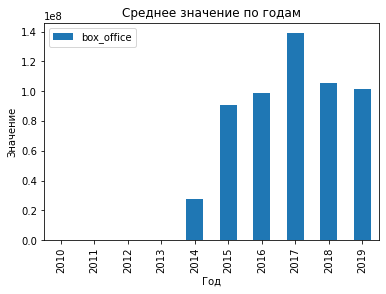

In [45]:
value_films = pd.pivot_table(df, index=['film_release'], values=['box_office'], aggfunc='mean').plot(kind='bar')
plt.title('Среднее значение по годам')
plt.xlabel('Год')
plt.ylabel('Значение')

Text(0, 0.5, 'Значение')

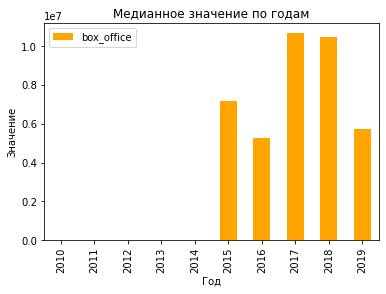

In [46]:
value_films = pd.pivot_table(df, index=['film_release'], values=['box_office'], aggfunc='median').plot(kind='bar', color='orange')
plt.title('Медианное значение по годам')
plt.xlabel('Год')
plt.ylabel('Значение')

#### Медианное значение почти одинаковое по всем годам, а вот срднее в 2017 году на много больше остальных, это может говорить о том, что в этом году были фильмы "выбросы" с очень большим сбором.

### 3.4. Определим, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год:

In [47]:
table_age_restriction = df.query('film_release.between(2015,2019)').pivot_table(index=['age_restriction'], values=['box_office'])
table_age_restriction

,box_office
age_restriction,
«0+» - для любой зрительской аудитории,1.453886e+07
«12+» - для детей старше 12 лет,1.975967e+08
«16+» - для детей старше 16 лет,9.745230e+07
«18+» - запрещено для детей,5.345750e+07
«6+» - для детей старше 6 лет,1.849260e+08


<AxesSubplot:xlabel='age_restriction'>

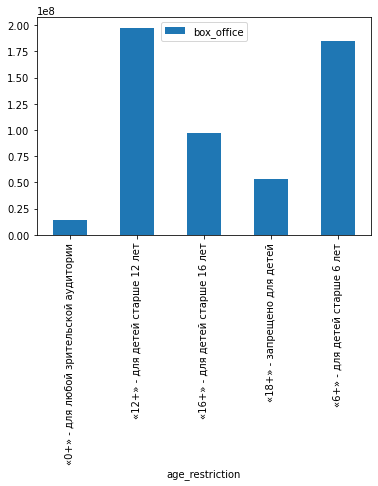

In [48]:
table_age_restriction.plot(kind='bar')

#### Возрастное ограничение влияет на сборы фильма. Так, фильмы с возрастным ограниченим 12+ и 6+ собирают в разы больше, чем фильмы с другими возрастными ограничениями. Самый маленький сбор у фильмов с возрастным ограничением - 0+.

#### 3.4.1. Проверим, меняется ли картина в завиисмости от года:

In [49]:
df.query('film_release.between(2015,2019)').pivot_table(index='film_release', columns='age_restriction', values='box_office')

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
film_release,,,,,
2015,1.488988e+07,2.094695e+08,7.001400e+07,4.320298e+07,1.528486e+08
2016,4.451263e+06,1.692740e+08,9.387868e+07,4.731410e+07,1.772429e+08
2017,1.143286e+08,2.227277e+08,1.538165e+08,6.775058e+07,2.840657e+08
2018,2.055951e+06,2.227076e+08,1.055027e+08,4.993018e+07,1.602836e+08
2019,1.377963e+07,1.835672e+08,7.997503e+07,5.755589e+07,1.806221e+08


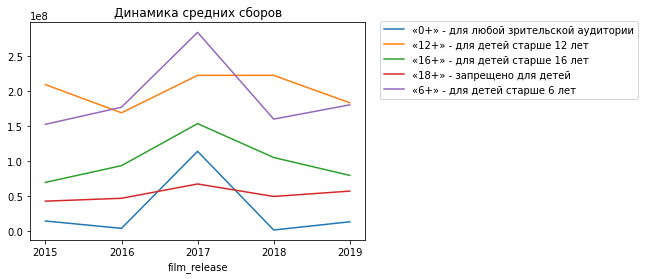

In [50]:
(
    df
    .query('film_release.between(2015,2019)')
    .pivot_table(index='film_release', columns='age_restriction', values='box_office')
    .plot()
)
plt.title('Динамика средних сборов')
plt.legend(bbox_to_anchor=(1.03, 1.03))
plt.xticks([2015,2016,2017,2018,2019]);

#### В период с 2015 по 2019 года больше всего сборов было у фльмов с возрастным ограничением 6+ и 12+, следовательно, картина в зависимости от года не меняется: соотношение возратной группы к сборам фильмв с каждым годом сохраняется.

### 4. Исследуем фильмы, которые получили государственную поддержку

#### 4.1. Посмотрим, сколько выделяют средств на поддержку кино:

In [51]:
refundable_support_sum = df['refundable_support'].sum()
print(f'Объём возвратных средств государственной поддержки: {refundable_support_sum}')

Объём возвратных средств государственной поддержки: 3869000000.0


In [52]:
nonrefundable_support_sum = df['nonrefundable_support'].sum()
print(f'Объём невозвратных средств государственной поддержки: {nonrefundable_support_sum}')

Объём невозвратных средств государственной поддержки: 15628018847.0


<AxesSubplot:>

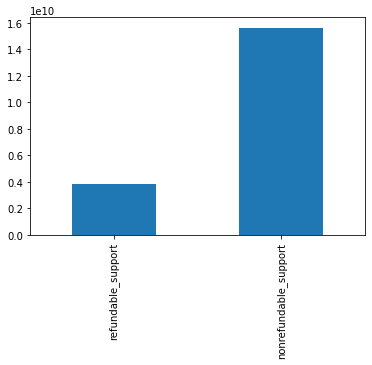

In [53]:
df[['refundable_support','nonrefundable_support']].sum().plot.bar()

#### Объём возыратных средст гос. поддержки составляет примерно 4 млрд. руб., невозвратных - 15 млрд. руб. В сумме на поддежру кино государство выделило почти 19 млрд. руб.

#### 4.2. Выясним, влияет ли гос. поддержка на рейтинг кино:

In [54]:
averg_ratings_support = df.loc[df['refundable_support'] + df['nonrefundable_support'] > 0, 'ratings'].mean()
print(f'Средний рейтинг фильмов с гос. поддержкой: {averg_ratings_support}')

Средний рейтинг фильмов с гос. поддержкой: 6.000636100769043


In [55]:
averg_ratings_nosupport = df.loc[(df['refundable_support'].isna()) & (df['nonrefundable_support'].isna()), 'ratings'].mean()
print(f'Средний рейтинг фильмов без гос. поддержки: {averg_ratings_nosupport}')

Средний рейтинг фильмов без гос. поддержки: 6.503571510314941


#### Фильмы без гос. поддержки имеют более высокий рейтинг. 

#### 4.3. Определим, окупаются ли фильмы с гос. поддержкой или нет:

In [56]:
(df['refundable_support'] + df['nonrefundable_support']).sum()

19497018847.0

In [57]:
df.loc[(df['refundable_support'].isna() == False) & (df['nonrefundable_support'].isna() == False), 'box_office'].sum()

40630624730.14

#### Фильмы с гос. поддержкой окупаются более чем в 2 раза!

### 5. Общий вывод

#### В данных много пропущенных значений по столбцам с гос. поддержкой и бюджетом, которые, к сожалению, заменить логически не получится. Эта проблема не позволяет сделать анализ в полной мере. 
#### Что качается проведенного анализа по тем данным, которые у нас есть, то можно сделать такой вывод: с кажом годом фильмы собирают больше сборов, чем в предидущем, самый "плотодворный" был 2017 год. Наибольшей популярностью пользуются фильмы с возрастной категорией 6+ и 12+,  наименьшей - 0+, и с каждым годом эта тенденция сохраняется. Фильмы, получившие гос. поддержку, окупаются в более чем 2 раза, но при этом имеют рейтинг ниже, чем фильмы без гос. поддержки.